In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage  # hierarchical clustering

In [2]:
data = pd.read_csv("wine-clustering.csv")

In [3]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
data.nunique()

Alcohol                 126
Malic_Acid              133
Ash                      79
Ash_Alcanity             63
Magnesium                53
Total_Phenols            97
Flavanoids              132
Nonflavanoid_Phenols     39
Proanthocyanins         101
Color_Intensity         132
Hue                      78
OD280                   122
Proline                 121
dtype: int64

In [6]:
model = KMeans(n_clusters = 3)

In [7]:
model.fit(data)

KMeans(n_clusters=3)

In [8]:
tahmin = model.predict(data)

In [9]:
tahmin

array([2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1])

In [10]:
silhouette_score(data, tahmin)

0.571138193786884

In [11]:
data.corr()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
Alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Ash_Alcanity,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_Phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_Phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417
Color_Intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100


In [12]:
data["Cluster"] = tahmin

In [13]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


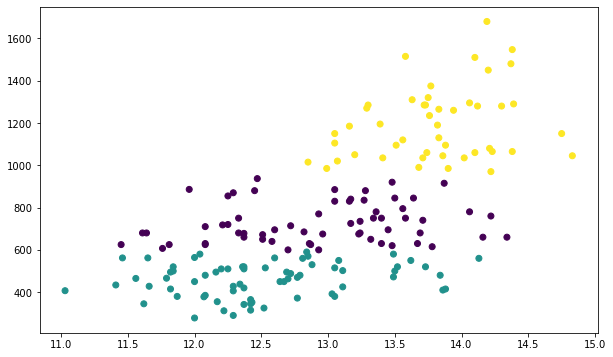

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(data["Alcohol"], data["Proline"], c = tahmin);  

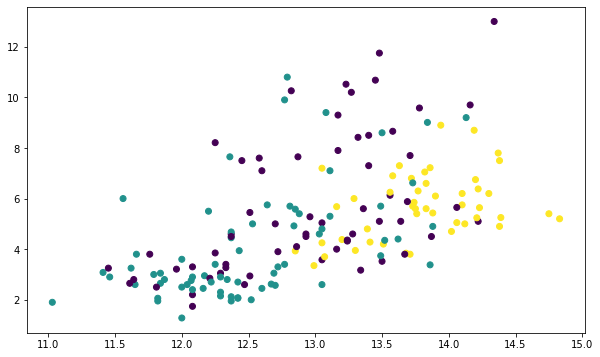

In [15]:
plt.figure(figsize=(10, 6))
plt.scatter(data["Alcohol"], data["Color_Intensity"], c = tahmin);

In [16]:
new_data = data[["Alcohol", "Color_Intensity", "Proline"]]

In [17]:
new_data.head() 

,Alcohol,Color_Intensity,Proline
0,14.23,5.64,1065
1,13.20,4.38,1050
2,13.16,5.68,1185
3,14.37,7.80,1480
4,13.24,4.32,735


In [18]:
new_model = KMeans(4)

In [19]:
new_model.fit(new_data)

KMeans(n_clusters=4)

In [20]:
new_tahmin = new_model.predict(new_data)

In [21]:
new_tahmin

array([0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 1, 1,
       0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 3, 1, 3, 1, 3, 3, 1,
       3, 3, 1, 1, 0, 3, 3, 0, 0, 3, 3, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3, 1,
       1, 1, 3, 3, 3, 3, 3, 0, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 1, 0, 0, 3, 1, 1, 1, 3, 3, 3, 1,
       1, 1, 3, 0, 1, 1, 3, 1, 1, 1, 1, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 0,
       0, 1])

In [22]:
silhouette_score(new_data, new_tahmin)

0.573392986901249

In [23]:
new_data["new_cluster_score"] = new_tahmin

In [24]:
new_data.head()

,Alcohol,Color_Intensity,Proline,new_cluster_score
0,14.23,5.64,1065,0
1,13.20,4.38,1050,0
2,13.16,5.68,1185,2
3,14.37,7.80,1480,2
4,13.24,4.32,735,1


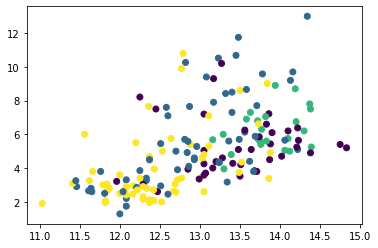

In [25]:
plt.scatter(new_data["Alcohol"], new_data["Color_Intensity"], c = new_tahmin);

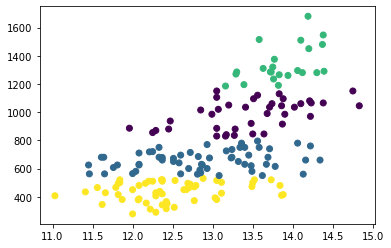

In [26]:
plt.scatter(new_data["Alcohol"], new_data["Proline"], c = new_tahmin);

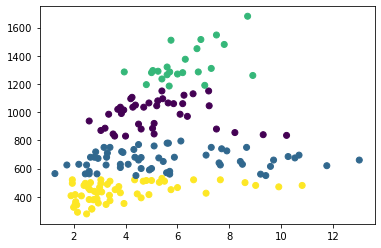

In [27]:
plt.scatter(new_data["Color_Intensity"], new_data["Proline"], c = new_tahmin);

In [28]:
x = new_data

In [29]:
all_score = []
all_cluster =[]
distance =[]
def clust(sayi):
    for i in range(2, sayi + 1):
        model = KMeans(i)
        model = model.fit(x)
        tahmin = model.predict(x)
        score = silhouette_score(x, tahmin)
        d = model.inertia_  # orta nokta
        print("Cluster : ", i, "Score", score)
        all_score.append(score)
        all_cluster.append(i)
        distance.append(d)
        

In [30]:
clust(10)

Cluster :  2 Score 0.6603781191538901
Cluster :  3 Score 0.5803395397908626
Cluster :  4 Score 0.5743419525551652
Cluster :  5 Score 0.5649663160658914
Cluster :  6 Score 0.5825756848216658
Cluster :  7 Score 0.5871336526576465
Cluster :  8 Score 0.572437952990523
Cluster :  9 Score 0.5790445734380741
Cluster :  10 Score 0.5669098831268979


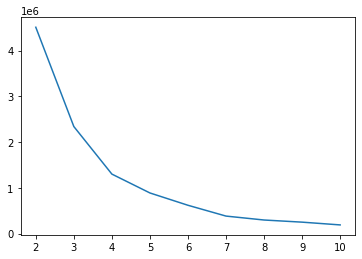

In [31]:
plt.plot(all_cluster, distance);  # elbow methodu

### Hyerarchical clustering

In [32]:
link_data = linkage(x, method = "ward", metric = "euclidean")

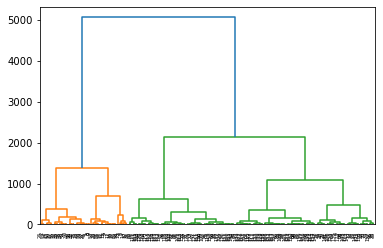

In [33]:
dendrogram(link_data)
plt.show();

# PCA (Principal Component Analysis)

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components = 2)
pca_data =pca.fit_transform(data)
pca_data = pd.DataFrame(pca_data, columns = ["PC1", "PC2"])
pca_data

,PC1,PC2
0,318.564096,21.482314
1,303.098549,-5.372870
2,438.062154,-6.543205
3,733.240924,0.190868
4,-11.572578,18.499472
...,...,...
173,-6.981364,-4.529766
174,3.130443,2.346221
175,88.456844,18.787452
176,93.455008,18.682040


In [37]:
## elbow
all_score = []
all_cluster =[]
distance = []
def clust(sayi):
    for i in range(2, sayi + 1):
        model = KMeans(i)
        model = model.fit(pca_data)
        tahmin = model.predict(pca_data)
        score = silhouette_score(pca_data, tahmin)
        d = model.inertia_  # orta nokta
        print("Cluster : ", i, "Score", score)
        all_score.append(score)
        all_cluster.append(i)
        distance.append(d)
        
        

In [38]:
clust(10)

Cluster :  2 Score 0.6572191835557125
Cluster :  3 Score 0.5722565640368522
Cluster :  4 Score 0.5633928243314785
Cluster :  5 Score 0.5510550722515045
Cluster :  6 Score 0.5677796855308425
Cluster :  7 Score 0.5645883496181832
Cluster :  8 Score 0.5441885782439445
Cluster :  9 Score 0.5325872686029038
Cluster :  10 Score 0.5253081239957643


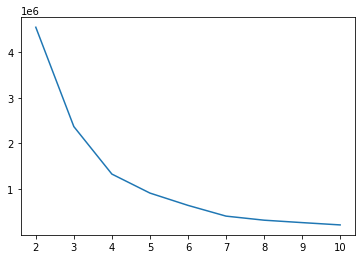

In [40]:
plt.plot(all_cluster, distance)
plt.show();

In [43]:
kmeans = KMeans(4)
kmeans.fit(pca_data)
tahmin = kmeans.predict(pca_data) 
pca_data["Cluster"] = tahmin

In [44]:
pca_data.head()

,PC1,PC2,Cluster
0,318.564096,21.482314,1
1,303.098549,-5.372870,1
2,438.062154,-6.543205,3
3,733.240924,0.190868,3
4,-11.572578,18.499472,2


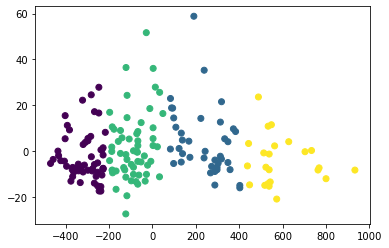

In [48]:
plt.scatter(pca_data["PC1"], pca_data["PC2"], c = tahmin)

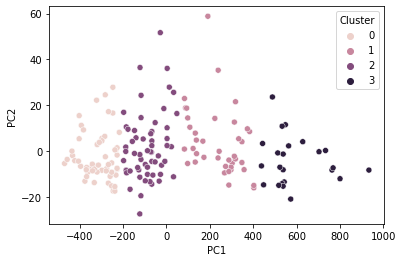

In [47]:
import seaborn as sbn
sbn.scatterplot(data = pca_data,x = "PC1", y = "PC2", hue = "Cluster")
plt.show()